In [23]:
!pip install quantecon_book_networks

Defaulting to user installation because normal site-packages is not writeable


In [24]:
import pandas as pd

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import quantecon_book_networks
import quantecon_book_networks.input_output as qbn_io
import quantecon_book_networks.plotting as qbn_plt
import quantecon_book_networks.data as qbn_data
import matplotlib as mpl
from matplotlib.patches import Polygon

In [26]:
import numpy as np

In [27]:
mip = pd.read_csv('../resources/MIP  - Hoja 1 (2).csv', index_col=0)

In [28]:
columnas = mip.columns

In [29]:
for col in columnas:
  mip[col] = mip[col].astype(float)

In [30]:
# no los vamos a droppear porque participan en el grafo aunque solo como sumideros
to_drop_by_row = [ col for col in columnas
   if (mip.loc[col,:].sum() == 0.0)]

to_drop_by_col = [ col for col in columnas
   if (mip.loc[:, col].sum() == 0.0)]

to_drop_by_row, to_drop_by_col

(['Enseñanza pública', 'Salud humana pública', 'Servicios sociales'], [])

In [31]:
mip.sum(axis=1)

Cultivo de cereales, oleaginosas y forrajeras                                     5763508.02
Cultivo de hortalizas, legumbres, flores y plantas ornamentales                    557481.67
Cultivo de frutas y nueces                                                         407583.33
Cultivos industriales                                                             1582424.83
Producción de semillas                                                             715253.18
                                                                                     ...    
Servicios sociales                                                                      0.00
Servicios de saneamiento                                                            27389.77
Actividad de asociaciones                                                          515534.08
Servicios de cine, radio y televisión                                             1304582.63
Servicios personales, de reparación, actividades deportivas y de espar

In [32]:
# Armo la matriz de coeficientes técnicos.
#El secotr en la fila i le vende al sector en la columna j. En el grafo se representa como i --> j.

for i in range(mip.shape[0]):
  suma = mip.iloc[i,:].sum()
  if suma > 0.0:
    mip.iloc[i,:] /= suma

In [33]:
mip.sum(axis=1)

Cultivo de cereales, oleaginosas y forrajeras                                     1.0
Cultivo de hortalizas, legumbres, flores y plantas ornamentales                   1.0
Cultivo de frutas y nueces                                                        1.0
Cultivos industriales                                                             1.0
Producción de semillas                                                            1.0
                                                                                 ... 
Servicios sociales                                                                0.0
Servicios de saneamiento                                                          1.0
Actividad de asociaciones                                                         1.0
Servicios de cine, radio y televisión                                             1.0
Servicios personales, de reparación, actividades deportivas y de esparcimiento    1.0
Length: 123, dtype: float64

In [34]:
mip.iloc[[110,116],:]

,"Cultivo de cereales, oleaginosas y forrajeras","Cultivo de hortalizas, legumbres, flores y plantas ornamentales",Cultivo de frutas y nueces,Cultivos industriales,Producción de semillas,"Cría de ganado y producción de leche, lana y pelos",Producción de granja,Servicios agropecuarios,Caza,Silvicultura y extracción de madera,...,Enseñanza pública,Enseñanza privada,Salud humana pública,Salud humana privada,Servicios veterinarios,Servicios sociales,Servicios de saneamiento,Actividad de asociaciones,"Servicios de cine, radio y televisión","Servicios personales, de reparación, actividades deportivas y de esparcimiento"
Servicios a las empresas y profesionales,0.000718,0.000166,0.000114,0.000190,0.000093,0.000793,0.000473,0.000121,0.000001,0.000347,...,0.003929,0.010216,0.007436,0.029850,0.000095,0.001394,0.026819,0.016192,0.018584,0.027990
Salud humana privada,0.001309,0.000479,0.000722,0.001434,0.000125,0.001237,0.000422,0.000105,0.000002,0.000187,...,0.014183,0.010809,0.149871,0.752836,0.003269,0.005645,0.000000,0.000708,0.000055,0.017979


In [35]:
mip.index

Index(['Cultivo de cereales, oleaginosas y forrajeras',
       'Cultivo de hortalizas, legumbres, flores y plantas ornamentales',
       'Cultivo de frutas y nueces', 'Cultivos industriales',
       'Producción de semillas',
       'Cría de ganado y producción de leche, lana y pelos',
       'Producción de granja', 'Servicios agropecuarios', 'Caza',
       'Silvicultura y extracción de madera',
       ...
       'Enseñanza pública', 'Enseñanza privada', 'Salud humana pública',
       'Salud humana privada', 'Servicios veterinarios', 'Servicios sociales',
       'Servicios de saneamiento', 'Actividad de asociaciones',
       'Servicios de cine, radio y televisión',
       'Servicios personales, de reparación, actividades deportivas y de esparcimiento'],
      dtype='object', length=123)

In [36]:
mip.to_csv("../resources/MIP_normalizada.csv")

In [37]:
graph = mip.copy()
graph = graph.values

In [38]:
# Removemos aristas a si mismas, solo para graficar
for i in range(mip.shape[0]):
    graph[i,i] = 0

In [39]:
graph.shape

(123, 123)

In [40]:
g = nx.Graph(graph)

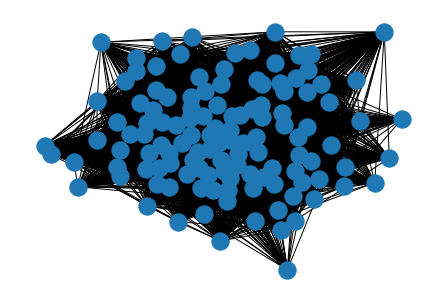

In [41]:
#Primer test
nx.draw(g, pos=nx.spring_layout(g))

In [42]:
?? qbn_plt.plot_graph # Uso esta implementación.

Object ` qbn_plt.plot_graph # Uso esta implementación.` not found.


In [43]:
grado_nodo = np.zeros(len(graph)) # Me fijo el grado de cada nodo segun un umbral. (No cuento aristas con poco peso)
for i in range(len(graph)):
  aristas = 0;
  for j in range(len(graph)):
    if graph[i][j] > 0.2:
      aristas = aristas + 1
  grado_nodo[i] = aristas


In [45]:
mip.loc[mip.columns[0]]

Cultivo de cereales, oleaginosas y forrajeras                                     1.031882e-02
Cultivo de hortalizas, legumbres, flores y plantas ornamentales                   0.000000e+00
Cultivo de frutas y nueces                                                        1.541931e-03
Cultivos industriales                                                             1.600824e-03
Producción de semillas                                                            0.000000e+00
                                                                                      ...     
Servicios sociales                                                                0.000000e+00
Servicios de saneamiento                                                          0.000000e+00
Actividad de asociaciones                                                         0.000000e+00
Servicios de cine, radio y televisión                                             1.735054e-09
Servicios personales, de reparación, actividades d

In [46]:
G.add_node?

Signature: G.add_node(node_for_adding, **attr)
Docstring:
Add a single node `node_for_adding` and update node attributes.

Parameters
----------
node_for_adding : node
    A node can be any hashable Python object except None.
attr : keyword arguments, optional
    Set or change node attributes using key=value.

See Also
--------
add_nodes_from

Examples
--------
>>> G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
>>> G.add_node(1)
>>> G.add_node("Hello")
>>> K3 = nx.Graph([(0, 1), (1, 2), (2, 0)])
>>> G.add_node(K3)
>>> G.number_of_nodes()
3

Use keywords set/change node attributes:

>>> G.add_node(1, size=10)
>>> G.add_node(3, weight=0.4, UTM=("13S", 382871, 3972649))

Notes
-----
A hashable object is one that can be used as a key in a Python
dictionary. This includes strings, numbers, tuples of strings
and numbers, etc.

On many platforms hashable items also include mutables such as
NetworkX Graphs, though one should be careful that the hash
doesn't change on mutables.
Fi

In [48]:
pos_nodos

{0: array([-0.48892052,  0.7794883 ]),
 1: array([-0.24189017, -0.91512273]),
 2: array([0.69121175, 0.39643984]),
 3: array([ 0.64587456, -0.62517416]),
 4: array([-0.89373714, -0.02792231]),
 5: array([0.86515254, 0.4235311 ]),
 6: array([0.86632077, 0.05212657]),
 7: array([-0.3973322, -0.9151535]),
 8: array([-0.59341234,  0.70631867]),
 9: array([0.88495207, 0.14246828]),
 10: array([-0.00268871,  0.90935768]),
 11: array([0.10363231, 0.90929398]),
 12: array([-0.19829339,  0.85526033]),
 13: array([-0.86715464, -0.2185836 ]),
 14: array([0.01920413, 0.93626606]),
 15: array([0.72769427, 0.66220031]),
 16: array([ 0.29840335, -0.9624879 ]),
 17: array([0.76275732, 0.50384242]),
 18: array([0.83261959, 0.24754501]),
 19: array([-0.31061907, -0.96163444]),
 20: array([ 0.53481799, -0.67634137]),
 21: array([-0.44952706, -0.86812592]),
 22: array([-0.69744595,  0.6464472 ]),
 23: array([ 0.89085948, -0.07596101]),
 24: array([-0.74972531,  0.55663501]),
 25: array([-0.80038676, -0.31

In [49]:
fig, ax = plt.subplots(figsize=(25, 25))
plt.axis("off")

G = nx.DiGraph()
N = len(graph)
centrality = qbn_io.eigenvector_centrality(mip) #Funcion para sacar colores lindos para el grafo.
colores_nodo = qbn_io.colorise_weights(centrality,beta=False)

#Agrego nodos.
for i, col in enumerate(mip.columns):
  G.add_node(col)



tamaños_nodo = 400 + (grado_nodo * 200)
edge_colors = []
edge_widths = []
for i in range(N):
  for j in range(N):
    a = graph[i,j]
    G.add_edge(mip.columns[i], mip.columns[j])
    edge_colors.append(colores_nodo[i])
    width = a
    edge_widths.append(width)

pos_nodos = nx.spring_layout(G)

nx.draw_networkx_nodes(G,
                       pos_nodos,
                       node_color=colores_nodo,
                       node_size=tamaños_nodo,
                       edgecolors='grey',
                       linewidths=10,
                       alpha=0.6,
                       ax=ax
                       )

nx.draw_networkx_edges(G,
                      pos_nodos,
                      edge_color=edge_colors,
                      width=edge_widths,
                      arrows=True,
                      arrowsize=5,
                      alpha=0.6,
                      ax=ax,
                      arrowstyle='->',
                      node_size= 10,
                      connectionstyle='arc3,rad=0.15')

nx.draw_networkx_labels(G,
                       pos_nodos,
                       font_size=7,
                       ax=ax
)


plt.show()